In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [2]:
RCfolder = 'C:/Users/nvladim/Documents/GitHub/RapidCell/RapidCell1.4.2/'
fileNameIndiv = 'individuals.out'
fileNameAve = 'averages.out'

In [120]:
A = np.loadtxt(RCfolder + fileNameIndiv)

In [121]:
x_max, ymax = 5, 5 #mm, parameters from RapidCell simulation, Main tab.
n_readouts = 7 #parameter from RapidCell simulation, Output tab.
n_cells = int((A.shape[1]-1)/n_readouts)
t_arr = A[:,0]
X_arr = A[:,1::n_readouts]
Y_arr = A[:,2::n_readouts]
Ori_arr = A[:,3::n_readouts]
CheA_arr = A[:,4::n_readouts]
CheY_arr = A[:,5::n_readouts]
Meth_arr = A[:,6::n_readouts]
Mbias_arr = A[:,7::n_readouts]

Text(0.5,1,'Mean and std methylation(t)')

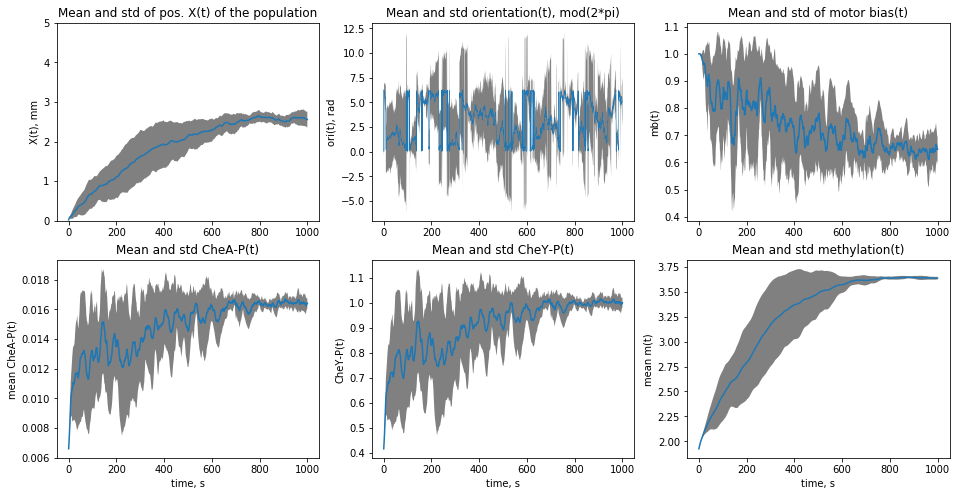

In [141]:
fig, ax = plt.subplots(2, 3, figsize = (16,8))
ax[0,0].plot(t_arr,X_arr.mean(axis=1))
ax[0,0].fill_between(t_arr, X_arr.mean(axis=1) - X_arr.std(axis=1), X_arr.mean(axis=1) + X_arr.std(axis=1),facecolor='gray')
ax[0,0].set_ylim([0, x_max])
ax[0,0].set_ylabel('X(t), mm')
ax[0,0].set_title("Mean and std of pos. X(t) of the population")

ax[0,1].plot(t_arr,Ori_arr.mean(axis=1)%(2*np.pi),lw=0.5)
ax[0,1].fill_between(t_arr, Ori_arr.mean(axis=1)%(2*np.pi) - Ori_arr.std(axis=1)%(2*np.pi), 
                     Ori_arr.mean(axis=1)%(2*np.pi) + Ori_arr.std(axis=1)%(2*np.pi),facecolor='gray')
ax[0,1].set_ylabel('ori(t), rad')
ax[0,1].set_title("Mean and std orientation(t), mod(2*pi)")

ax[0,2].plot(t_arr,Mbias_arr.mean(axis=1))
ax[0,2].fill_between(t_arr, Mbias_arr.mean(axis=1) - Mbias_arr.std(axis=1), Mbias_arr.mean(axis=1) + Mbias_arr.std(axis=1),facecolor='gray')
ax[0,2].set_ylabel('mb(t)')
ax[0,2].set_title("Mean and std of motor bias(t)")

ax[1,0].plot(t_arr,CheA_arr.mean(axis=1))
ax[1,0].fill_between(t_arr, CheA_arr.mean(axis=1) - CheA_arr.std(axis=1), CheA_arr.mean(axis=1) + CheA_arr.std(axis=1),facecolor='gray')
ax[1,0].set_ylabel('mean CheA-P(t)')
ax[1,0].set_xlabel('time, s')
ax[1,0].set_title("Mean and std CheA-P(t)")

ax[1,1].plot(t_arr,CheY_arr.mean(axis=1))
ax[1,1].fill_between(t_arr, CheY_arr.mean(axis=1) - CheY_arr.std(axis=1), CheY_arr.mean(axis=1) + CheY_arr.std(axis=1),facecolor='gray')
ax[1,1].set_ylabel('CheY-P(t)')
ax[1,1].set_xlabel('time, s')
ax[1,1].set_title("Mean and std CheY-P(t)")

ax[1,2].plot(t_arr,Meth_arr.mean(axis=1))
ax[1,2].fill_between(t_arr, Meth_arr.mean(axis=1) - Meth_arr.std(axis=1), Meth_arr.mean(axis=1) + Meth_arr.std(axis=1),facecolor='gray')
ax[1,2].set_ylabel('mean m(t)')
ax[1,2].set_xlabel('time, s')
ax[1,2].set_title("Mean and std methylation(t)")

Text(0.5,1,'Trajectories of individual cells over time')

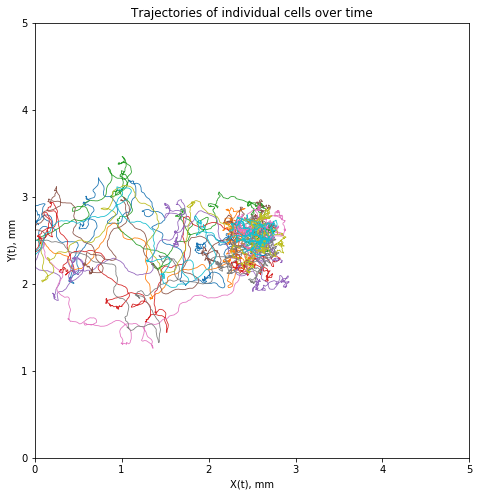

In [143]:
fig = plt.figure(figsize=(8,8))
plt.plot(X_arr,Y_arr,lw=0.8)
plt.axis("square")
plt.xlim([0, x_max])
plt.ylim([0, y_max])
plt.xlabel('X(t), mm')
plt.ylabel('Y(t), mm')
plt.title("Trajectories of individual cells over time")